## Import libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from Funtion_model import *



pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Load data

In [2]:
data1 = pd.read_csv('/Users/yuriawano/fetal_health_classification/data/fetal_health_modeling.csv')
data1

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_variance,fetal_health
0,71.611347,-1.833548,-3.904537,-1.363542,-1.677820,37.264136,-1.698371,7.49855,-0.229605,15.008226,1.339407,0.752864,53149.942412,4.672702,B
1,77.866926,-1.833548,-3.904537,-1.363542,-1.694483,10.777798,-1.698371,7.49855,-0.229605,22.632791,1.339612,2.228554,53149.942412,2.610067,A
2,78.384675,-1.833548,-3.904537,-1.363542,-1.694483,10.209278,-1.698371,7.49855,-0.229605,22.632791,1.339612,1.956520,53149.942412,2.698445,A
3,78.901899,-1.833548,-3.904537,-1.363542,-1.694483,10.209278,-1.698371,7.49855,-0.229605,21.312087,1.339612,3.221597,53149.942412,2.698445,A
4,77.866926,-1.833548,-3.904537,-1.363542,-1.677820,10.209278,-1.698371,7.49855,-0.229605,21.312087,1.339612,2.877034,53149.942412,2.514309,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,81.994480,-1.833548,-3.904537,-1.363542,-1.677820,39.771841,-1.698371,7.49855,-0.229605,11.309256,1.339612,1.639072,53149.942412,0.702658,B
2109,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.356632,-1.698371,7.49855,-0.229605,15.283736,1.339612,2.228554,53149.942412,1.122632,B
2110,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.771841,-1.698371,7.49855,-0.229605,15.420003,1.339612,1.956520,53149.942412,1.424686,B
2111,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.356632,-1.698371,7.49855,-0.229605,15.283736,1.339612,2.228554,53149.942412,1.424686,B


## Train the model

In [3]:
X = data1.drop('fetal_health', axis = 1)
y  = data1['fetal_health']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1690, 14), (423, 14), (1690,), (423,))

## Scaling the imbalanced data: Upsampling

In [6]:
y_train.value_counts()

A    1305
B     238
C     147
Name: fetal_health, dtype: int64

In [7]:
upsample = pd.concat([X_train, y_train], axis =1)
upsample

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_variance,fetal_health
1491,76.829840,-1.833548,-3.904537,-1.363542,-1.677820,21.615679,-1.698371,7.498550,-0.229605,13.413574,1.339612,2.228554,53149.942412,1.424686,A
1105,72.659587,-1.833548,-3.904537,-1.363542,-1.677820,15.637316,-1.698371,2.072439,-0.229605,9.456557,1.339612,0.000000,53149.942412,1.122632,A
162,72.659587,-1.833548,-3.904537,-1.363542,-1.677820,18.683316,-1.698371,5.280009,-0.229605,15.146484,1.339612,0.752864,53149.942412,1.424686,A
1553,84.557990,-1.833548,-3.904537,-1.363542,-1.677820,26.305597,-1.698371,0.842500,-0.229605,10.958094,1.339612,0.752864,53149.942412,0.702658,A
1607,83.021340,-1.833548,-3.904537,-1.363542,-1.654421,33.422585,-1.698371,7.498550,-0.746032,23.892121,1.339612,2.877034,53149.942412,4.318061,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,77.866926,-1.833548,-3.904537,-1.363542,-1.623717,29.915487,-1.698371,7.498550,-0.229605,21.207673,1.339612,1.956520,53149.942412,5.194186,A
1095,72.659587,-1.833548,-3.904537,-1.363542,-1.677820,12.989068,-1.698371,7.498550,-0.229605,11.134744,1.339612,1.639072,53149.942412,1.424686,A
1130,72.659587,-1.833548,-3.904537,-1.363542,-1.682980,13.528059,-1.698371,7.498550,-0.229605,15.689672,1.339612,1.253648,53149.942412,3.475492,A
1294,80.965641,-1.833548,-3.904537,-1.363542,-1.672667,18.683316,-1.698371,6.489261,-0.229605,16.859660,1.339612,1.956520,53149.942412,2.929005,A


In [8]:
A = upsample[upsample['fetal_health'] == 'A'].sample(1300) # needs the replace because it has less than 400 rows
B = upsample[upsample['fetal_health'] == 'B'].sample(1300, replace=True)
C = upsample[upsample['fetal_health'] == 'C'].sample(1300, replace=True)

upsampled_df = pd.concat([A, B, C]).sample(frac=1) # .sample(frac=1) here is just to shuffle the dataframe


In [9]:
upsampled_df.shape

(3900, 15)

In [10]:
upsampled_df['fetal_health'].value_counts()

A    1300
C    1300
B    1300
Name: fetal_health, dtype: int64

In [11]:
X_train_up = upsampled_df.drop(['fetal_health'], axis =1)
y_train_up = upsampled_df['fetal_health']

### Scaling the numericals and save the transformation file

In [12]:
transformer = StandardScaler().fit(X_train_up)
x_standardized = transformer.transform(X_train_up)

In [13]:
transformer = StandardScaler().fit(X_test)
x_standardized = transformer.transform(X_test)

In [14]:
X_train_up.shape, X_test.shape

((3900, 14), (423, 14))

## Model evaluation of upsampling metrix
+ Here we will test on Logistic Regression, KNN and Random Forest
+ Using functions from .py file

### Logistic regression

1) Logistic regression score: 0.7021276595744681
2) Confustion metrix:
[[244  45  52]
 [  6  33  15]
 [  3   5  20]]
3) Confustion metrix plot: see bottom plot
AxesSubplot(0.125,0.125;0.62x0.755)
4) Classification report:
              precision    recall  f1-score   support

           A       0.96      0.72      0.82       341
           B       0.40      0.61      0.48        54
           C       0.23      0.71      0.35        28

    accuracy                           0.70       423
   macro avg       0.53      0.68      0.55       423
weighted avg       0.84      0.70      0.75       423



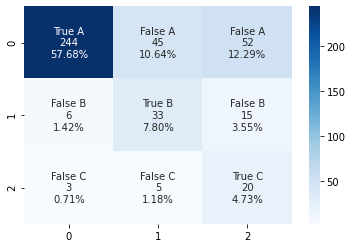

In [15]:
logistic_regression(X_train_up, y_train_up, X_test, y_test)

### KNN-Algorithm

#### Hyperparatemer: find the perfect K value

In [16]:
scores = []
for i in range(1,20,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_up, y_train_up)
    y_pred = model.predict(X_test)
    scores.append((metrics.accuracy_score(y_test, y_pred)))
scores

[0.9125295508274232,
 0.8723404255319149,
 0.8321513002364066,
 0.8203309692671394,
 0.8014184397163121,
 0.7872340425531915,
 0.7801418439716312,
 0.7754137115839244,
 0.7730496453900709,
 0.7801418439716312]

Text(0, 0.5, 'Accuracy')

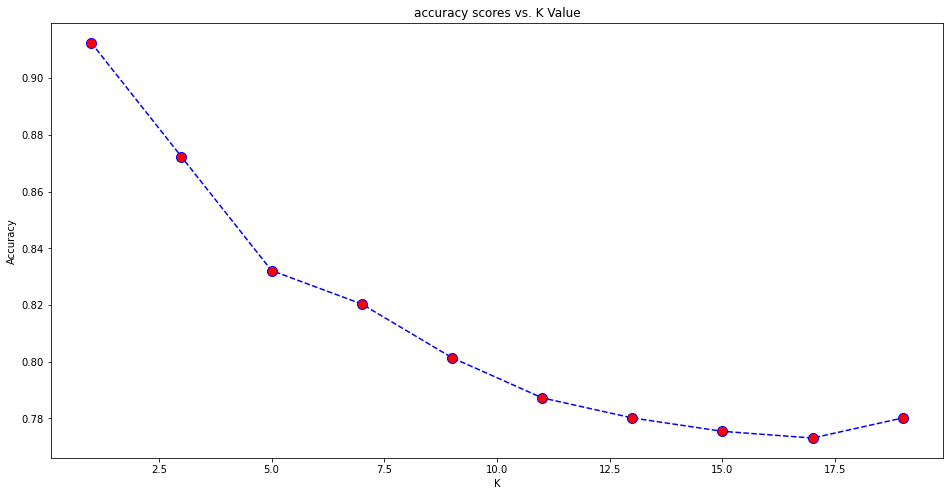

In [17]:
plt.figure(figsize=(16,8))
plt.plot(range(1,20,2),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

#### Apply into KNN model
Use funtion from .py file

In [18]:
knn_classifier(X_train_up, y_train_up, X_test, y_test, 10)

1) KNN Classifier accuracy score:
0.8156028368794326
2) Confusion metrix:
3) Classification report
              precision    recall  f1-score   support

           A       0.96      0.82      0.89       341
           B       0.47      0.74      0.57        54
           C       0.53      0.86      0.66        28

    accuracy                           0.82       423
   macro avg       0.65      0.81      0.71       423
weighted avg       0.87      0.82      0.83       423



### Random Forest
Using funtion from .py file

### Check accuracy score with defaulted parameters

In [19]:
random_forest(X_train_up, y_train_up, X_test, y_test)

1) Random forest accuracy score: 0.8534278959810875


### Hyperparameter selection with Gridsearch

In [20]:
# number of trees in random forest model building
n_estimators = [50, 100, 150, 200, 500, 1000]
# number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# max number of level in the trees
max_depth = [2,4,6,8,10]
# min number of samples required to split the node
min_samples_split = [2,4]
# min number of samples 
min_samples_leaf = [1, 2]


# create the parameter grid
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
    }

# find the best params for random forest! 
clf = RandomForestClassifier(random_state=100)
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X_train_up,y_train_up)
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [22]:
random_forest_param_test(X_train_up, y_train_up, 'auto', 1, 2, 10, 50)

0.9474358974358974
